# Dive into NFL based Data and Analytics 

In [2]:
# By Tyran Javon Johnson

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print("hello")

hello


In [4]:
# All data collected on players is year by year, not by season. Each year a team plays 14-16 games, and 2-3 games in the following year
# First lets pull some data and start solving some questions. 

df = pd.read_csv("./FOOTBALL/ALL NFL pbp/Team Stats/nfl_offense_stats.csv")
#df.head()

In [5]:
nfl = df

In [6]:
df3 = pd.read_csv("./FOOTBALL/ALL NFL pbp/player_stats/2021_player_stats/2021_player_receiving.csv")

In [7]:
df4 = pd.read_csv("./FOOTBALL/ALL NFL pbp/player_stats/2021_player_stats/2021_player_rushing.csv")

In [8]:
df5 = pd.read_csv("./FOOTBALL/ALL NFL pbp/player_stats/2021_player_stats/2021_player_passing.csv")

In [9]:
df_merge = pd.merge(df3, df4, on="player")

In [10]:
# Below is offensive stats for rushing, passing and recieving. Before merging, I made column in each df was unique minus the most left column ("player")
off_2021 = pd.merge(df_merge, df5, on="player")
off_2021.head()

,player,rec,rec_yds,rec_td,rec_20+,rec_40+,rec_lng,rec_1st,rec_1st%,rec_fum,...,pass_td,int,rate,pass_1st,pass_1st%,pass_20+,pass_40+,pass_long,sck,scky
0,Justin Jefferson,108,1616,10,27,5,56,75,0.694,1,...,0,0,106.2,2,0.667,1,0,24,0,0
1,Deebo Samuel,77,1405,6,23,9,83,51,0.662,4,...,1,0,133.3,1,0.500,1,0,24,0,0
2,Christian Kirk,77,982,5,16,4,50,44,0.571,0,...,0,0,118.8,1,1.000,1,0,33,0,0
3,Jakobi Meyers,83,866,2,12,0,39,42,0.506,1,...,0,0,118.8,1,0.500,1,0,30,0,0
4,Tyler Boyd,67,828,5,10,2,68,37,0.552,1,...,0,0,118.8,1,1.000,1,1,46,0,0


In [11]:
off_2021.columns

Index(['player', 'rec', 'rec_yds', 'rec_td', 'rec_20+', 'rec_40+', 'rec_lng',
       'rec_1st', 'rec_1st%', 'rec_fum', 'tgts', 'yd/rec', 'rush_yds',
       'rush_att', 'rush_td', 'rush_20+', 'Rush_40+', 'rush_lng', 'rus_1st',
       'rush_1st%', 'rush_fum', 'pass _yds', 'pass_yat', 'pass_att',
       'pass_cmp', 'cmp%', 'pass_td', 'int', 'rate', 'pass_1st', 'pass_1st%',
       'pass_20+', 'pass_40+', 'pass_long', 'sck', 'scky'],
      dtype='object')

In [12]:
# Concating the dfs results in me losing some data.
df_concat = pd.concat([df3, df4, df5])
df_concat.head()

,player,rec,rec_yds,rec_td,rec_20+,rec_40+,rec_lng,rec_1st,rec_1st%,rec_fum,...,pass_td,int,rate,pass_1st,pass_1st%,pass_20+,pass_40+,pass_long,sck,scky
0,Cooper Kupp,145.0,1947.0,16.0,30.0,9.0,59.0,89.0,0.614,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Justin Jefferson,108.0,1616.0,10.0,27.0,5.0,56.0,75.0,0.694,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Davante Adams,123.0,1553.0,11.0,19.0,4.0,59.0,84.0,0.683,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ja'Marr Chase,81.0,1455.0,13.0,22.0,8.0,82.0,56.0,0.691,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Deebo Samuel,77.0,1405.0,6.0,23.0,9.0,83.0,51.0,0.662,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# This is adding Yahoo default fantasy points per offensive stats minus any special teams points scored for offensive players.
# Fantasy points vary depending on league and scoring setting

off_2021 = off_2021.assign(fan_rush = round(off_2021["rush_yds"] / 8, 2))
off_2021 = off_2021.assign(fan_pass = round(off_2021["pass _yds"] / 20, 2))
off_2021 = off_2021.assign(fan_int = round(off_2021["int"] * -2, 2))
off_2021 = off_2021.assign(fan_pass_td = round(off_2021["pass_td"] * 5, 2))
off_2021 = off_2021.assign(fan_rush_td = round(off_2021["rush_td"] * 5, 2))
off_2021 = off_2021.assign(fan_rec_yds = round(off_2021["rec_yds"] / 8, 2))
off_2021 = off_2021.assign(fan_rec_td = round(off_2021["rec_td"] * 5, 2))
off_2021 = off_2021.assign(fan_rec = round(off_2021["rec"] * .5, 2))
off_2021 = off_2021.assign(fan_rush_fum = round(off_2021["rush_fum"] * -2, 2))
off_2021 = off_2021.assign(fan_rec_fum = round(off_2021["rec_fum"] * -2, 2))




In [14]:
# Total Fantasy points for offensive players during the 2021 season
off_2021["total_fp"] = off_2021[["fan_rush", "fan_pass", "fan_int", "fan_pass_td", "fan_rush_td", "fan_rec_yds", "fan_rec_td", "fan_rec", "fan_rush_fum", "fan_rec_fum"]].sum(axis=1)

In [15]:
off_2021.head()
# I want to find the average points scored for each player, but unfortunately games played is missing
# To fix this problem, I will extract this df and add more details to it using excel

,player,rec,rec_yds,rec_td,rec_20+,rec_40+,rec_lng,rec_1st,rec_1st%,rec_fum,...,fan_pass,fan_int,fan_pass_td,fan_rush_td,fan_rec_yds,fan_rec_td,fan_rec,fan_rush_fum,fan_rec_fum,total_fp
0,Justin Jefferson,108,1616,10,27,5,56,75,0.694,1,...,1.75,0,0,0,202.00,50,54.0,0,-2,307.50
1,Deebo Samuel,77,1405,6,23,9,83,51,0.662,4,...,1.20,0,5,40,175.62,30,38.5,0,-8,327.94
2,Christian Kirk,77,982,5,16,4,50,44,0.571,0,...,1.65,0,0,0,122.75,25,38.5,0,0,189.28
3,Jakobi Meyers,83,866,2,12,0,39,42,0.506,1,...,2.25,0,0,0,108.25,10,41.5,0,-2,161.12
4,Tyler Boyd,67,828,5,10,2,68,37,0.552,1,...,2.30,0,0,0,103.50,25,33.5,0,-2,165.05


In [16]:
# Saving off_2021 as an csv file

off_2021.to_csv('off_2021.csv', index=False)
off_2021.to_excel('offf_2021.xlsx', index=False)




In [17]:
off_2021.columns

Index(['player', 'rec', 'rec_yds', 'rec_td', 'rec_20+', 'rec_40+', 'rec_lng',
       'rec_1st', 'rec_1st%', 'rec_fum', 'tgts', 'yd/rec', 'rush_yds',
       'rush_att', 'rush_td', 'rush_20+', 'Rush_40+', 'rush_lng', 'rus_1st',
       'rush_1st%', 'rush_fum', 'pass _yds', 'pass_yat', 'pass_att',
       'pass_cmp', 'cmp%', 'pass_td', 'int', 'rate', 'pass_1st', 'pass_1st%',
       'pass_20+', 'pass_40+', 'pass_long', 'sck', 'scky', 'fan_rush',
       'fan_pass', 'fan_int', 'fan_pass_td', 'fan_rush_td', 'fan_rec_yds',
       'fan_rec_td', 'fan_rec', 'fan_rush_fum', 'fan_rec_fum', 'total_fp'],
      dtype='object')

In [18]:
off_2021.describe(include='all').round(2)

,player,rec,rec_yds,rec_td,rec_20+,rec_40+,rec_lng,rec_1st,rec_1st%,rec_fum,...,fan_pass,fan_int,fan_pass_td,fan_rush_td,fan_rec_yds,fan_rec_td,fan_rec,fan_rush_fum,fan_rec_fum,total_fp
count,15,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,...,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00
unique,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Justin Jefferson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,41.47,536.47,2.73,7.47,1.80,37.93,23.47,0.49,0.60,...,37.71,-4.93,20.00,14.33,67.06,13.67,20.73,-2.27,-1.20,196.64
std,NaN,36.08,531.60,3.20,8.91,2.76,27.82,22.77,0.31,1.06,...,63.18,8.55,36.55,18.89,66.45,15.98,18.04,5.06,2.11,84.56
min,NaN,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.20,-26.00,0.00,0.00,0.12,0.00,0.00,-20.00,-8.00,60.59
25%,NaN,2.50,34.00,0.00,0.00,0.00,15.50,2.50,0.36,0.00,...,1.23,-7.00,0.00,0.00,4.25,0.00,1.25,-2.00,-2.00,149.14
50%,NaN,45.00,420.00,2.00,5.00,0.00,38.00,21.00,0.54,0.00,...,2.25,0.00,5.00,5.00,52.50,10.00,22.50,0.00,0.00,189.28
75%,NaN,72.00,847.00,5.00,11.00,3.00,62.00,39.50,0.63,1.00,...,44.12,0.00,15.00,25.00,105.88,25.00,36.00,0.00,0.00,236.73


In [19]:
off_2021.iloc[:,1:10].apply(np.mean)

rec          41.466667
rec_yds     536.466667
rec_td        2.733333
rec_20+       7.466667
rec_40+       1.800000
rec_lng      37.933333
rec_1st      23.466667
rec_1st%      0.489533
rec_fum       0.600000
dtype: float64

In [20]:
players = pd.read_csv("./FOOTBALL/players.csv")

In [21]:
# theres a ton of columns in the df. Here is a way to see all the column names
nfl.head().T

,0,1,2,3,4
player,Garrett Bradbury,C.J. Goodwin,Adam Prentice,Adam Prentice,Andy Janovich
year,2022,2022,2022,2022,2022
position,C,CB,FB,FB,FB
team,MIN,DAL,NOR,NOR,CLE
pass_cmp,0,0,0,0,0
...,...,...,...,...,...
Humidity,60,45,45,45,60
wind_speed,9,0,0,0,12
vegas_line,-13.0,-3.0,-6.5,-3.5,-2.0
vegas_favorite,GNB,DAL,NOR,NOR,PIT


# A dive into NFL Player Stats

In [22]:
# Average recieving YAC yards. 
nfl.iloc[:,47:53].apply(np.mean)

rush_broken_tackles     0.145096
rec_air_yds            21.977875
rec_yac                 9.532569
rec_drops               0.133731
offense                32.708857
off_pct                48.993691
dtype: float64

In [23]:
# This is the max rec Yac from 2019 to 2022 by any postion
nfl.iloc[:,47:53].apply(np.max)

rush_broken_tackles     11.0
rec_air_yds            320.6
rec_yac                153.0
rec_drops                6.0
offense                100.0
off_pct                100.0
dtype: float64

In [24]:
## The most rec yac from 2019 to 2022 seasons was 153 yards. In a single game. By Jamaar Chase!!! GEAUX TIGERS

# Task 1: Find the average rec yac of only pass catchers. Mininum of at least one target.

In [25]:
nfl_max_yac = nfl.iloc[:,49:50].apply(np.max)

In [26]:
# Im all over the place. This is the max rec yac.
nfl_max_yac = nfl.iloc[:,49:50].apply(np.max)
print(nfl_max_yac)

rec_yac    153
dtype: int64


In [27]:
mean_yac = (nfl['rec_yac'].loc[nfl['rec_yac'] != 0]).mean()
print(mean_yac)

17.35904449307075


# Task 2: List QBs that had 300+ passing yards games in a game

In [28]:
# First I will try to set a value of 300+ passing yards.
nfl_qb_top_tier = nfl['pass_yds'] >=300
nfl[nfl_qb_top_tier]

,player,year,position,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,...,home_score,ot,roof,surface,temperature,Humidity,wind_speed,vegas_line,vegas_favorite,over_under
46,Joe Burrow,2022,QB,CIN,30,39,446,4,0,4,...,34,False,outdoors,fieldturf,33,81,13,-4.0,KAN,51.5
47,Tom Brady,2022,QB,TAM,34,50,410,3,1,1,...,24,False,outdoors,fieldturf,57,82,9,-13.5,TAM,45.5
48,Patrick Mahomes,2022,QB,KAN,30,39,404,5,1,3,...,42,False,outdoors,grass,30,78,8,-12.5,KAN,46.5
49,Justin Herbert,2022,QB,LAC,34,64,383,3,1,3,...,35,True,dome,grass,72,45,0,-3.0,LAC,49.0
50,Patrick Mahomes,2022,QB,KAN,33,44,378,3,0,2,...,42,True,outdoors,grass,35,54,6,-2.0,KAN,54.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14292,Dak Prescott,2019,QB,DAL,23,33,303,4,0,3,...,47,False,retractable roof (closed),fieldturf,72,45,0,-12.5,DAL,47.5
14293,Joe Flacco,2019,QB,DEN,22,38,303,3,1,0,...,24,False,outdoors,grass,87,11,14,-2.5,DEN,37.0
14294,Daniel Jones,2019,QB,NYG,28,47,301,1,1,4,...,17,False,outdoors,fieldturf,42,69,5,-4.0,PHI,44.0
14295,Jameis Winston,2019,QB,TAM,21,43,301,2,2,3,...,27,False,outdoors,grass,59,67,3,-2.0,TEN,45.5


In [29]:
# Here is a second way to get the same table which shows all passing yards of 300 and greater.
# nfl.query('pass_yds >=300')

In [30]:
nfl_qb = nfl[nfl_qb_top_tier]

In [31]:
# Now I will try to count exactly how many times each player had over 300 passing yards in a game
nfl_qb = nfl_qb.sort_values(by="pass_yds", ascending=False)

In [32]:
new_qb_df = nfl_qb.sort_values(by="pass_yds", ascending=False)

In [33]:
results = new_qb_df['player'].value_counts()

In [34]:
# The above shows leaders for the most 300 more passing yards in a game from 2019 to 2022.

In [35]:
# Testing a function 
def my_first_function(a, b, c):
    if a > b:
        return("LEGENDARY")
    if b > c:
        return("ELITE")
    return("GOOD")
# The result below are the top 5 QBs total 300+ passing yard games over 2021-2022 season.
results.head()

Patrick Mahomes    25
Tom Brady          23
Matt Ryan          20
Josh Allen         17
Justin Herbert     17
Name: player, dtype: int64

<AxesSubplot:>

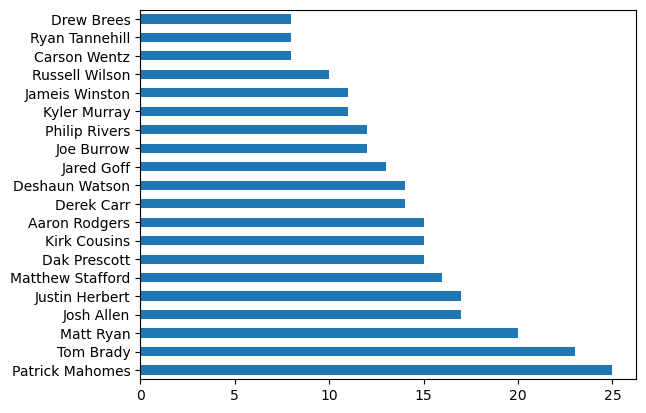

In [36]:
# heres a bar graph for players with the most 300 or more yards thrown in a game since 2019.
new_qb_df['player'].value_counts()[:20].plot(kind='barh')

In [37]:
# This is to test pulling a column from the dataset. In this case, I want to view the pass_td
nfl_stats = pd.io.parsers.read_csv("./FOOTBALL/All NFL pbp/Team Stats/nfl_offense_stats.csv")
X = nfl_stats[['pass_td']]
print(X)

       pass_td
0            0
1            0
2            0
3            0
4            0
...        ...
19968        0
19969        0
19970        0
19971        0
19972        0

[19973 rows x 1 columns]


In [38]:
# The above looks great. Here is how to view it as a list
nfl_stats = pd.io.parsers.read_csv("./FOOTBALL/All NFL pbp/Team Stats/nfl_offense_stats.csv")
X = nfl_stats[['pass_td']].values
print(X)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [39]:
print(pd.__version__)

1.5.2


In [40]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [41]:
#making sure pandas is up to date
pip install --upgrade pandas

SyntaxError: invalid syntax (4027025645.py, line 2)

In [ ]:
# All the occurrences a QB has thrown for 3 tds or more in a game.
# if you want to just see the names, put in 'player' at the end. 
nfl.loc[nfl['pass_td'] >= 3,]

# Task 3: QB data with TDS > Turnovers

In [ ]:
# This is what I got so far. I will need to work on cleaning up my results to show only QB stats
nfl[nfl['position'].isin(['QB'])]
qb_data = nfl[nfl['position'].isin(['QB'])]
qb_data.query('pass_td > fumbles_lost + pass_int')

# Task 4: Filter out the data to only see offensive stats using PBP Data

In [ ]:
# This syntax shows a dataframse of the primary offensive skill positions
nfl[nfl['position'].isin(['QB', 'WR', 'RB', 'HB', 'FB', 'TE'])]
offensive_skill = nfl[nfl['position'].isin(['QB', 'WR', 'RB', 'HB', 'FB', 'TE'])]

In [42]:
# This will only show QB data
nfl[nfl['position'].isin(['QB'])]
qb_data = nfl[nfl['position'].isin(['QB'])]

In [43]:
# WRs only
nfl[nfl['position'].isin(['WR'])]
wr_data = nfl[nfl['position'].isin(['WR'])]

In [44]:
# Top receivers in the league in yards.

new_wr_data = wr_data[wr_data['year'].isin([2022, 2021])]
wr_stats = new_wr_data.groupby(new_wr_data['player']).aggregate({'rec': 'sum', 'rec_yds': 'sum', 'rec_td': 'sum', 'rec_long': 'max', 'rush_td': 'sum', 'rec_yac': 'sum', 'targets': 'sum'})
top_wr = wr_stats.sort_values(by='rec_yds', ascending=False).iloc[0:50]


In [45]:
# Top 5 WR in the NFL
rec_yac = wr_data.groupby(wr_data['player']).aggregate({'rec_yac': 'sum'})
rec_yac.sort_values(by=['rec_yac'],ascending = False).head(5)

,rec_yac
player,
Cooper Kupp,2122
Deebo Samuel,1841
Davante Adams,1786
Chris Godwin,1547
Tyreek Hill,1516


In [46]:
# Yards per reception shows how many yards a receiver gain by every catch. 
wr_stats['yards_per_rec'] = wr_stats['rec_yds'] / wr_stats['rec']

# YAC Percentage. Percent of total yards that come after catch. 
wr_stats['yac_pct'] = wr_stats['rec_yac'] / wr_stats['rec_yds'] * 100

# Catch percentage will represent the percent of catches a playes gets. These numbers can vary
wr_stats['catch_p'] = wr_stats['rec'] / wr_stats['targets'] * 100
wr1 = wr_stats.round(decimals = 2)

In [47]:
wr1.sort_values(by='rec_yds', ascending=False).head(10)

,rec,rec_yds,rec_td,rec_long,rush_td,rec_yac,targets,yards_per_rec,yac_pct,catch_p
player,,,,,,,,,,
Cooper Kupp,182,2503,22,70,0,1059,242,13.75,42.31,75.21
Tyreek Hill,158,1879,12,75,0,765,218,11.89,40.71,72.48
Ja'Marr Chase,106,1823,14,82,0,822,163,17.20,45.09,65.03
Davante Adams,156,1822,14,59,0,696,211,11.68,38.20,73.93
Justin Jefferson,117,1749,10,56,0,531,179,14.95,30.36,65.36
Stefon Diggs,136,1679,12,61,0,449,213,12.35,26.74,63.85
Deebo Samuel,87,1559,7,83,9,922,135,17.92,59.14,64.44
Mike Evans,105,1521,18,55,0,380,166,14.49,24.98,63.25
Chris Godwin,119,1468,8,52,1,724,166,12.34,49.32,71.69


In [48]:
# Here is the percentage of yards after catch for the top 25 wrs. 
top_wr['rec_yac'] / top_wr['rec_yds'] * 100
# Hey look at Jarvis Landry sitting at 49.8% of yards after the catch. I cant wait to see what he can do for the BLACK & GOLD!!

player
Cooper Kupp            42.309229
Tyreek Hill            40.713145
Ja'Marr Chase          45.090510
Davante Adams          38.199780
Justin Jefferson       30.360206
Stefon Diggs           26.742108
Deebo Samuel           59.140475
Mike Evans             24.983563
Chris Godwin           49.318801
Diontae Johnson        40.838068
Tee Higgins            30.285714
Tyler Lockett          25.152905
D.J. Moore             34.658188
Mike Williams          34.529506
Marquise Brown         36.385542
A.J. Brown             25.542169
Brandin Cooks          31.005819
Michael Pittman Jr.    34.666667
Terry McLaurin         28.167808
CeeDee Lamb            39.193825
Darnell Mooney         36.062718
Keenan Allen           29.613357
Hunter Renfrow         45.000000
D.K. Metcalf           32.749077
Chase Claypool         30.526316
Christian Kirk         23.523717
Jaylen Waddle          43.251232
Marvin Jones           16.798419
Van Jefferson          30.300000
Gabriel Davis          21.261445
DeV

In [49]:
import math

# I'm going to attempt to calculate percentiles of yards for WRs. 

def my_percentile(top_wr, percentile):
    n = len(wr1.rec_yds)
    p = n * percentile/100
    if p.is_integer():
        return sorted(wr1.rec_yds)[int(p)]
    else:
        return sorted(wr1.rec_yds)[int(math.ceil(p)) - 1]

dist = np.random.randn(10)
index = [5, 25, 50, 75, 95]
perc_func = [my_percentile(dist, i) for i in index]
print(perc_func)
# Key: There is a huge jump in percentile from WRs in the 75 and 95 percent. 

[0, 21, 148, 507, 1245]


In [50]:
# Who leads in YAC from 2019-2022?
wr_data.sort_values(by=['rec_yac', 'rec', 'rec_yds'])

more_results = wr_data.groupby('player')['rec_yac'].sum()


# Task 5: A look at the top RBs during the 2021-22 Season

In [51]:
# RBs & HBs
nfl[nfl['position'].isin(['RB', 'HB'])]
rbs_data = nfl[nfl['position'].isin(['RB', 'HB'])]

In [52]:
rb_data = rbs_data[rbs_data['year'].isin([2022, 2021])]

In [53]:
highest_rushers_2021 = rb_data.groupby(rbs_data['player']).aggregate({'rush_yds': 'sum', 'rush_td': 'sum', 'rec': 'sum'})
high_low_rushers = highest_rushers_2021.sort_values(by='rush_yds', ascending=False)
#These are the top 10 rushers for 2021
high_low_rushers.iloc[0:10]

,rush_yds,rush_td,rec
player,,,
Jonathan Taylor,2142,21,43
Nick Chubb,1512,9,26
Joe Mixon,1467,14,60
Derrick Henry,1292,13,21
Najee Harris,1229,7,76
Leonard Fournette,1176,13,98
Dalvin Cook,1159,6,34
Antonio Gibson,1143,7,45
Elijah Mitchell,1132,6,26


In [54]:
# Ill just loom into the top 50 rushers when comparing numbers for now
top_50_rushers = high_low_rushers.iloc[0:50]

In [55]:
# This is the table of the top 50 backs of 2021
all_rb_data = rb_data.groupby(rbs_data['player']).aggregate({'rush_att': 'sum', 'rush_yds': 'sum', 'rush_td': 'sum', 'rec': 'sum', 'rec_yds': 'sum', 'rec_td': 'sum'})
all_rb_data.sort_values(by='rush_yds', ascending=False).iloc[0:25]
td_sum = all_rb_data["rec_td"] + all_rb_data["rush_td"]
all_rb_data["total_tds"] = td_sum
new_rb_data = all_rb_data.sort_values(by='rush_yds', ascending=False).iloc[0:50]
new_rb_data.head()

,rush_att,rush_yds,rush_td,rec,rec_yds,rec_td,total_tds
player,,,,,,,
Jonathan Taylor,383,2142,21,43,367,2,23
Nick Chubb,273,1512,9,26,247,2,11
Joe Mixon,359,1467,14,60,421,3,17
Derrick Henry,291,1292,13,21,165,0,13
Najee Harris,319,1229,7,76,466,3,10


In [56]:
# YPC for the top 50
ypc = new_rb_data['rush_yds'] / new_rb_data['rush_att']
new_rb_data["ypc"] = ypc
new_rb_data = new_rb_data.round(2)
new_rb_data.head()

,rush_att,rush_yds,rush_td,rec,rec_yds,rec_td,total_tds,ypc
player,,,,,,,,
Jonathan Taylor,383,2142,21,43,367,2,23,5.59
Nick Chubb,273,1512,9,26,247,2,11,5.54
Joe Mixon,359,1467,14,60,421,3,17,4.09
Derrick Henry,291,1292,13,21,165,0,13,4.44
Najee Harris,319,1229,7,76,466,3,10,3.85


In [57]:
# Here are the averages accross the board for rbs 2021-2022
new_rb_data.describe(include='all').round(2)

,rush_att,rush_yds,rush_td,rec,rec_yds,rec_td,total_tds,ypc
count,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00
mean,194.88,848.78,6.68,38.82,288.58,1.60,8.28,4.38
std,68.33,323.53,4.31,18.95,149.41,1.86,5.06,0.57
min,99.00,442.00,0.00,6.00,48.00,0.00,0.00,3.51
25%,144.75,617.25,4.00,26.00,175.25,0.00,5.00,4.03
50%,172.50,757.50,6.00,35.50,265.50,1.00,8.00,4.34
75%,248.00,1035.75,8.00,51.00,366.25,2.00,11.00,4.60
max,383.00,2142.00,21.00,98.00,680.00,9.00,23.00,6.14


In [58]:
# Top 10 YPC leaders 2021-2022
new_ypc = new_rb_data.sort_values(by='ypc', ascending=False)
new_ypc.ypc.head(10)

player
Rashaad Penny       6.14
Jonathan Taylor     5.59
Nick Chubb          5.54
Tony Pollard        5.38
Miles Sanders       5.35
D'Ernest Johnson    5.34
Kareem Hunt         4.93
Chase Edmonds       4.86
Aaron Jones         4.71
James Robinson      4.68
Name: ypc, dtype: float64

In [59]:
# TE's only
nfl[nfl['position'].isin(['TE'])]
te_data = nfl[nfl['position'].isin(['TE'])]

In [60]:
# The only TEs to produce over 2000 yards over the last 3 full seasons. 
te_stats = te_data.groupby(te_data['player']).aggregate({'rec': 'sum', 'rec_yds': 'sum', 'rec_td': 'sum', 'rec_long': 'max', 'rush_td': 'sum', 'rec_yac': 'sum', 'targets': 'sum'})
top_te = te_stats[(te_stats['rec_yds'] > 2000)]
print(top_te)

                rec  rec_yds  rec_td  rec_long  rush_td  rec_yac  targets
player                                                                   
Dallas Goedert  173     2126      12        45        0      974      248
Darren Waller   259     3082      14        75        0     1400      367
George Kittle   215     2740      14        61        0     1417      284
Mark Andrews    241     3022      26        51        0      963      363
Mike Gesicki    177     2053      13        70        0      550      286
Travis Kelce    361     4593      34        69        2     1899      498
Zach Ertz       203     2079      12        47        0      721      327


# Task 5: Solve some questions that provide factors to win/lose probability.

In [61]:
# Lets first try to define wins and losses. Since the data takes in every play, there is duplicate data for scores that exist.
# I will create a new column to the dataframe outlining which team (visitor or home) won. 


conditions = [nfl['vis_score'] > nfl['home_score'],
              nfl['vis_score'] < nfl['home_score']]

choices = ['visitor', 'home']

nfl['winning_team'] = np.select(conditions, choices, default='tie')


In [62]:
# Lets get rid of duplicate games since the dataframe is factoring in players from the same team.
# Below are 5 different variables that will remain constant for duplicates.

wins_losses_data = nfl[['year', 'vis_team', 'home_team', 'home_score', 'vis_score', 'winning_team']]
wins_loss_data = wins_losses_data.drop_duplicates()
wins_loss_data

# The data below shows all regular season and playoff games from 2019 to 2022. 


,year,vis_team,home_team,home_score,vis_score,winning_team
0,2022,MIN,GNB,37,10,home
1,2022,SFO,DAL,17,23,visitor
2,2022,CAR,NOR,18,10,home
3,2022,NOR,ATL,20,30,visitor
4,2022,CLE,PIT,26,14,home
...,...,...,...,...,...,...
14552,2019,CHI,LAR,17,7,home
14555,2019,NYJ,PHI,31,6,home
14563,2019,PIT,NYJ,16,10,home
14599,2019,WAS,MIA,16,17,visitor


In [63]:
# The probability the home team won a game
import seaborn as sns
%matplotlib inline

plt_wins = wins_loss_data['winning_team'].value_counts().rename_axis('the_values').reset_index(name='counts')

In [64]:
# Here is the wins, losses, and ties percentage
(wins_loss_data['winning_team'].value_counts()/wins_loss_data['winning_team'].count())*100

home       50.975610
visitor    48.658537
tie         0.365854
Name: winning_team, dtype: float64

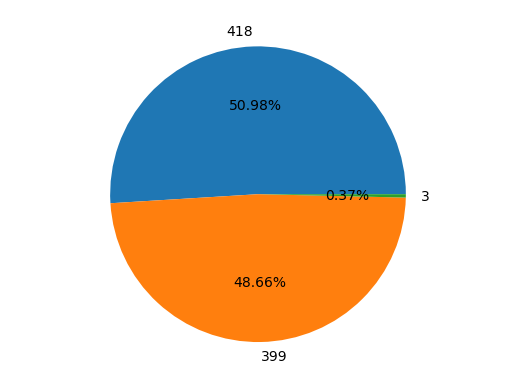

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axis('equal')
ax.pie(your_values, labels = your_values, autopct='%1.2f%%')
plt.show()

In [68]:
your_labels = plt_wins.the_values
your_values = plt_wins.counts

# What is the success rate of extra point field goal attempts in 2019-2020?

In [69]:
plays = pd.read_csv("./FOOTBALL/ALL NFL pbp/plays.csv")

In [70]:
# This is the win and loss percentage for 2019 and 2020.
wins_losses_data['year'].unique()

array([2022, 2021, 2020, 2019], dtype=int64)

In [71]:
# We ll just look at the 2019-2020 season. 
wins_losses_data[wins_losses_data['year'].isin([2019, 2020])]

,year,vis_team,home_team,home_score,vis_score,winning_team
7714,2020,CLE,TEN,35,41,visitor
7715,2020,MIN,SFO,27,10,home
7716,2020,BAL,IND,10,24,visitor
7717,2020,CLE,NYG,6,20,visitor
7718,2020,ATL,DAL,40,39,home
...,...,...,...,...,...,...
19968,2019,LVR,KAN,40,9,home
19969,2019,TEN,LVR,21,42,visitor
19970,2019,JAX,LVR,16,20,visitor
19971,2019,LVR,LAC,17,24,visitor


In [72]:
# Making a year column from the game id info.

plays['year'] = plays['game_id'].astype(str).str[:4]


In [73]:
# Number of times from 2019-2020 that a extra point kicked was missed
plays_19_20 = plays[plays['year'].isin(['2019', '2020'])]

plays_19_20['special_teams_result'].value_counts()


Kick Attempt Good           3466
Touchback                   3337
Return                      3310
Fair Catch                  1026
Downed                       517
Out of Bounds                416
Kick Attempt No Good         389
Muffed                       128
Non-Special Teams Result      64
Blocked Kick Attempt          46
Blocked Punt                  23
Kickoff Team Recovery         11
Name: special_teams_result, dtype: int64

In [74]:
# of the total kicks missed, how many were for extra point?

extra_point = plays_19_20[plays_19_20['special_teams_play_type'].isin(['Extra Point'])]
(extra_point['special_teams_result'].value_counts()/extra_point['special_teams_result'].count())*100


Kick Attempt Good           92.921551
Kick Attempt No Good         5.816050
Blocked Kick Attempt         0.901713
Non-Special Teams Result     0.360685
Name: special_teams_result, dtype: float64

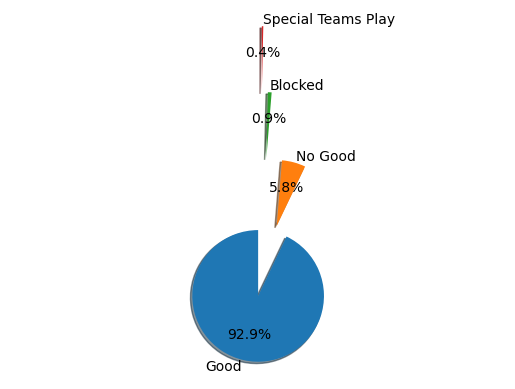

In [75]:
# Heres a pie chart showing the extra point kick success rate

labels = 'Good', 'No Good', 'Blocked', 'Special Teams Play'
sizes = [92.92, 5.82, 0.92, 0.36]
explode = (0.1, 1, 2, 3)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [76]:
# I feel that 2021 season experienced higher than average made extra point kicks. Let check it out. 
plays_2021 = plays[plays['year'].isin(['2021'])]
extra_point_2021 = plays_2021[plays_2021['special_teams_play_type'].isin(['Extra Point'])]
(extra_point_2021['special_teams_result'].value_counts()/extra_point_2021['special_teams_result'].count())*100
# The above findings shows there were no blocked extra point field goal attempts in 2021.
# It appears the rate of missed extra point attempts was about the same from 2019-2020 compared to 2021. 


Kick Attempt Good       94.117647
Kick Attempt No Good     5.882353
Name: special_teams_result, dtype: float64

# What was the percentage of times teams went for it on 4th down in 2021? 

In [77]:
# 2021 pbp data only shows plays of teams for the year of 2021. There are one or possibly 2 games missing for each team that were palyed in Janaury 2021

pbp_2021 = pd.read_csv("./FOOTBALL/ALL NFL pbp/pbp-2021.csv")
# 4th down data for 2021
last_down = pbp_2021[pbp_2021['down'].isin([4])]
# Here is the success rate of 4th downs


In [78]:
last_down.head(10)      

,gameId,game_date,quarter,minute,second,offense_team,defense_team,down,togo,yard_line,...,is_interception,is_fumble,is_penalty,is_twopoint_conversion,is_twopoint_conversion_success,rush_direction,yard_line_fixed,yard_line_direction,is_penalty_accepted,penalty_team
156,2021102410,10/24/2021,3,11,28,IND,SF,4,1,51,...,0,1,0,0,0,LEFT TACKLE,49,OPP,0,NaN
186,2021111409,11/14/2021,3,0,14,DEN,PHI,4,1,77,...,0,1,0,0,0,CENTER,23,OPP,0,NaN
198,2021101710,10/17/2021,2,1,32,DAL,NE,4,1,99,...,0,1,0,0,0,CENTER,1,OPP,0,NaN
221,2021111407,11/14/2021,3,0,48,ARI,CAR,4,1,69,...,0,1,0,0,0,NaN,31,OPP,0,NaN
225,2021102401,10/24/2021,3,5,57,WAS,GB,4,1,99,...,0,1,0,0,0,CENTER,1,OPP,0,NaN
226,2021102409,10/24/2021,3,0,22,TB,CHI,4,1,99,...,0,1,0,0,0,CENTER,1,OPP,0,NaN
237,2021091202,9/12/2021,2,11,33,CAR,NYJ,4,1,96,...,0,1,0,0,0,NaN,4,OPP,0,NaN
243,2021092602,9/26/2021,2,7,23,DET,BAL,4,19,40,...,0,1,1,0,0,NaN,40,OWN,1,DET
244,2021092300,9/23/2021,2,4,11,CAR,HOU,4,8,31,...,0,1,1,0,0,NaN,31,OWN,1,CAR
248,2021100313,10/3/2021,3,7,45,NE,TB,4,21,12,...,0,1,1,0,0,NaN,12,OWN,1,NE


In [79]:
pbp_2021.columns


Index(['gameId', 'game_date', 'quarter', 'minute', 'second', 'offense_team',
       'defense_team', 'down', 'togo', 'yard_line', 'penalty_type',
       'series_first_down', 'penalty_yards', 'isno_play', 'description',
       'season_year', 'Unnamed: 16', 'yards', 'yard_gained', 'down_picked_up',
       'formation', 'play_type', 'is_rush', 'is_pass', 'is_incomplete',
       'rush_yds', 'pass_yds', 'is_touchdown', 'pass_type', 'is_sack',
       'is_challenge', 'is_challenge_reversed', 'is_measurement',
       'is_interception', 'is_fumble', 'is_penalty', 'is_twopoint_conversion',
       'is_twopoint_conversion_success', 'rush_direction', 'yard_line_fixed',
       'yard_line_direction', 'is_penalty_accepted', 'penalty_team'],
      dtype='object')

# Task 6: Looking at Teams stats using pbp data

In [80]:
# Team yards during the 2021 year. Not season. 

pbp_2021.groupby('offense_team')[['yards', 'is_touchdown', 'is_sack']].sum().sort_values(by = "yards", ascending = False)

,yards,is_touchdown,is_sack
offense_team,,,
DAL,6638,51,31
TB,6404,55,21
LAC,6324,56,33
KC,6251,49,28
BUF,6112,54,27
BAL,6039,46,51
CIN,6023,54,52
ARI,6022,50,37
MIN,5996,45,27


In [81]:
# All 4th down instances. No punts or field goals included. 
last_down_down = last_down[last_down['down'].isin([4])]
last_down_down.tail()

,gameId,game_date,quarter,minute,second,offense_team,defense_team,down,togo,yard_line,...,is_interception,is_fumble,is_penalty,is_twopoint_conversion,is_twopoint_conversion_success,rush_direction,yard_line_fixed,yard_line_direction,is_penalty_accepted,penalty_team
42728,2021100300,10/3/2021,3,1,26,ATL,WAS,4,2,58,...,0,0,1,0,0,NaN,42,OPP,1,WAS
42731,2021092700,9/27/2021,4,8,26,PHI,DAL,4,10,43,...,0,0,1,0,0,NaN,43,OWN,0,PHI
42737,2021103107,10/31/2021,1,2,9,CIN,NYJ,4,3,97,...,0,0,0,0,0,NaN,3,OPP,0,NaN
42744,2021092609,9/26/2021,4,3,7,NYJ,DEN,4,6,41,...,0,0,0,0,0,NaN,41,OWN,0,NaN
42779,2021092601,9/26/2021,4,3,2,CHI,CLE,4,10,35,...,0,0,0,0,0,NaN,35,OWN,0,NaN


In [82]:
# Here is all the plays where a team went for it on 4th down
last_plays = last_down[last_down['down'].isin([4])]
# Out of the times a team decided to go for it on 4th. This is their success rate of picking up the down
success_rate = np.where(last_plays["yards"] >= last_plays["togo"], True, False)
(last_plays['yards'] >= last_plays['togo']).mean()*100

10.198379435596536

In [83]:
# What is the chances a team goes for it on 4th or decides to punt/kick?
formation_index = last_plays['formation'].value_counts()
formation_index
# If a team was in any formation, besides punt and field goal, they were lined up to go for the 4th down.

PUNT                 1864
FIELD GOAL            834
SHOTGUN               489
UNDER CENTER          337
NO HUDDLE SHOTGUN      34
NO HUDDLE              21
Name: formation, dtype: int64

In [84]:
last_plays.head()

,gameId,game_date,quarter,minute,second,offense_team,defense_team,down,togo,yard_line,...,is_interception,is_fumble,is_penalty,is_twopoint_conversion,is_twopoint_conversion_success,rush_direction,yard_line_fixed,yard_line_direction,is_penalty_accepted,penalty_team
156,2021102410,10/24/2021,3,11,28,IND,SF,4,1,51,...,0,1,0,0,0,LEFT TACKLE,49,OPP,0,NaN
186,2021111409,11/14/2021,3,0,14,DEN,PHI,4,1,77,...,0,1,0,0,0,CENTER,23,OPP,0,NaN
198,2021101710,10/17/2021,2,1,32,DAL,NE,4,1,99,...,0,1,0,0,0,CENTER,1,OPP,0,NaN
221,2021111407,11/14/2021,3,0,48,ARI,CAR,4,1,69,...,0,1,0,0,0,NaN,31,OPP,0,NaN
225,2021102401,10/24/2021,3,5,57,WAS,GB,4,1,99,...,0,1,0,0,0,CENTER,1,OPP,0,NaN


In [85]:
# This is all the relavent data covering times where teams were sucessful on 4th down.
success_rate_data = last_plays[last_plays['yards']>=last_plays['togo']]

In [86]:
# how often did teams rush, pass, or scramble on 4th down successes?
success_rate_data['play_type'].value_counts()

PASS        198
RUSH        151
SCRAMBLE     16
Name: play_type, dtype: int64

In [87]:
# percentages of the above. 
(success_rate_data['play_type'].value_counts()/success_rate_data['play_type'].count())*100


PASS        54.246575
RUSH        41.369863
SCRAMBLE     4.383562
Name: play_type, dtype: float64

In [88]:
# Teams that successfully completed a 4th down attempt gained on average 9.2 yards. Teams went for it on average about 3 yards out.
success_rate_data[["yards", "togo"]].mean()

yards    9.213699
togo     2.983562
dtype: float64

In [89]:
last_plays['quarter'].value_counts()

4    1023
2     995
3     789
1     739
5      33
Name: quarter, dtype: int64

In [90]:
success_rate_data['quarter'].value_counts()

4    150
2     81
3     69
1     61
5      4
Name: quarter, dtype: int64

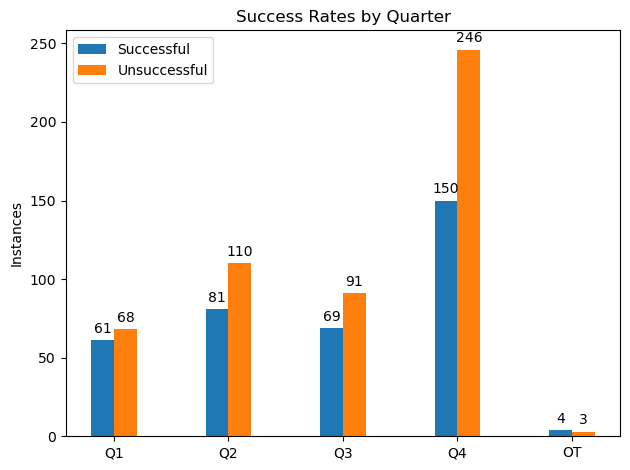

In [91]:
# Heres a bar chart showing all the successful and unsuccessful 4th down conversions by quarter.
#Teams tend to take more chance and go for it in the 2nd and 4th quarter.

labels = ['Q1', 'Q2', 'Q3', 'Q4', 'OT']
successful = [61, 81, 69, 150, 4]
unsuccessful = [68, 110, 91, 246, 3]

x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, successful, width, label='Successful')
rects2 = ax.bar(x + width/2, unsuccessful, width, label='Unsuccessful')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Instances')
ax.set_title('Success Rates by Quarter')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)


fig.tight_layout()

plt.show()

In [92]:
pbp_2021

,gameId,game_date,quarter,minute,second,offense_team,defense_team,down,togo,yard_line,...,is_interception,is_fumble,is_penalty,is_twopoint_conversion,is_twopoint_conversion_success,rush_direction,yard_line_fixed,yard_line_direction,is_penalty_accepted,penalty_team
0,2021100306,10/3/2021,2,8,59,NYG,NO,1,10,48,...,0,1,0,0,0,NaN,48,OWN,0,NaN
1,2021092605,9/26/2021,2,2,56,NE,NO,3,10,44,...,1,1,0,0,0,NaN,44,OWN,0,NaN
2,2021111411,11/14/2021,3,5,49,LV,KC,1,10,43,...,0,1,0,0,0,NaN,43,OWN,0,NaN
3,2021111404,11/14/2021,5,6,56,PIT,DET,2,8,19,...,0,1,0,0,0,NaN,19,OWN,0,NaN
4,2021091207,9/12/2021,3,12,55,ARI,TEN,1,10,25,...,0,1,0,0,0,NaN,25,OWN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42790,2021112102,11/21/2021,4,0,4,CHI,BAL,1,10,48,...,0,0,0,0,0,NaN,48,OWN,0,NaN
42791,2021121300,12/13/2021,4,0,5,ARI,LA,2,16,42,...,0,0,0,0,0,NaN,42,OWN,0,NaN
42792,2021091911,9/19/2021,4,5,35,LAC,DAL,2,7,93,...,0,0,0,0,0,NaN,7,OPP,0,NaN
42793,2021112801,11/28/2021,3,4,6,HOU,NYJ,3,13,63,...,0,0,0,0,0,NaN,37,OPP,0,NaN


## Saints In Deph data

In [93]:
# Match playtype with the team
# offense = NO
saints_pbp_2021 = pbp_2021[pbp_2021['offense_team'].isin(['NO'])]


In [94]:
# Talley up the occurences of different variables in the play type column
saints_counts = saints_pbp_2021["play_type"].value_counts()
saints_counts

PASS                    471
RUSH                    392
PUNT                     81
KICK OFF                 72
SACK                     39
EXTRA POINT              34
SCRAMBLE                 32
NO PLAY                  30
FIELD GOAL               22
QB KNEEL                 11
TWO-POINT CONVERSION      5
FUMBLES                   1
Name: play_type, dtype: int64

In [95]:
# These are the percentages of offensive plays ran by the saints for 2021

saints_percent = saints_pbp_2021["play_type"].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
saints_percent

PASS                    39.58%
RUSH                    32.94%
PUNT                     6.81%
KICK OFF                 6.05%
SACK                     3.28%
EXTRA POINT              2.86%
SCRAMBLE                 2.69%
NO PLAY                  2.52%
FIELD GOAL               1.85%
QB KNEEL                 0.92%
TWO-POINT CONVERSION     0.42%
FUMBLES                  0.08%
Name: play_type, dtype: object

In [96]:
print(saints_percent)

PASS                    39.58%
RUSH                    32.94%
PUNT                     6.81%
KICK OFF                 6.05%
SACK                     3.28%
EXTRA POINT              2.86%
SCRAMBLE                 2.69%
NO PLAY                  2.52%
FIELD GOAL               1.85%
QB KNEEL                 0.92%
TWO-POINT CONVERSION     0.42%
FUMBLES                  0.08%
Name: play_type, dtype: object


In [97]:
# What was the saints 3rd down percentage?
# Conditions series_first_down = 1 down = 3

saints_3rd_downs = saints_pbp_2021[saints_pbp_2021['quarter'] == 3]
saints_3rd_downs['series_first_down'] == 1

70       False
195       True
430      False
657       True
784      False
         ...  
41924    False
42016    False
42058    False
42099    False
42217    False
Name: series_first_down, Length: 262, dtype: bool

In [98]:
saints_3rd_downs['series_first_down'].count()

262

In [99]:
saints_3rd_downs['series_first_down'].unique()

array([0, 1], dtype=int64)

In [100]:
# the value counts for successes on 3rd down

saints_3rd_downs['series_first_down'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

# 1 = successful third down conversion

0    75.95%
1    24.05%
Name: series_first_down, dtype: object

In [101]:
# Average time of possesion
saints_pbp_2021

,gameId,game_date,quarter,minute,second,offense_team,defense_team,down,togo,yard_line,...,is_interception,is_fumble,is_penalty,is_twopoint_conversion,is_twopoint_conversion_success,rush_direction,yard_line_fixed,yard_line_direction,is_penalty_accepted,penalty_team
54,2021121908,12/19/2021,1,10,6,NO,TB,1,10,19,...,0,1,0,0,0,NaN,19,OWN,0,NaN
56,2021120200,12/2/2021,2,6,3,NO,DAL,1,10,34,...,0,1,0,0,0,NaN,34,OWN,0,NaN
70,2021102500,10/25/2021,3,1,45,NO,SEA,1,10,28,...,0,1,0,0,0,NaN,28,OWN,0,NaN
195,2021112107,11/21/2021,3,5,26,NO,PHI,2,1,34,...,0,1,0,0,0,CENTER,34,OWN,0,NaN
287,2021122700,12/27/2021,4,8,25,NO,MIA,3,31,16,...,0,1,0,0,0,RIGHT GUARD,16,OWN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42620,2021122700,12/27/2021,4,9,8,NO,MIA,2,21,26,...,0,0,0,0,0,NaN,26,OWN,0,NaN
42643,2021110706,11/7/2021,4,5,10,NO,ATL,3,10,73,...,0,0,1,0,0,NaN,27,OPP,1,ATL
42684,2021120200,12/2/2021,4,15,0,NO,DAL,3,2,74,...,0,0,0,0,0,NaN,26,OPP,0,NaN
42706,2021122700,12/27/2021,4,9,39,NO,MIA,1,10,37,...,0,0,0,0,0,NaN,37,OWN,0,NaN


In [102]:
offense_list =  ['series_first_down', 'penalty_yards', 'yards', 'is_rush', 'is_pass', 'is_touchdown', 'is_incomplete', 'is_sack', 'is_challenge', 'is_challenge_reversed', 'is_measurement', 'is_fumble', 'is_penalty', 'is_penalty_accepted']

In [103]:
saints_offense = saints_pbp_2021[offense_list]
saints_offense.sum()

series_first_down         350
penalty_yards             716
yards                    4912
is_rush                   424
is_pass                   471
is_touchdown               43
is_incomplete             187
is_sack                    39
is_challenge                0
is_challenge_reversed       0
is_measurement              0
is_fumble                  14
is_penalty                 95
is_penalty_accepted        86
dtype: int64

In [104]:
#league average offensive metrics
league_offense = pbp_2021[offense_list]
league_offense.sum()/32
# The NO Saints are below league averages in most categories. 

series_first_down         502.12500
penalty_yards             769.68750
yards                    5518.15625
is_rush                   391.71875
is_pass                   546.71875
is_touchdown               41.68750
is_incomplete             186.50000
is_sack                    36.06250
is_challenge                3.65625
is_challenge_reversed       1.56250
is_measurement              0.00000
is_fumble                  18.15625
is_penalty                103.56250
is_penalty_accepted        91.59375
dtype: float64

In [105]:
raiders_pbp_2021 = pbp_2021[pbp_2021['offense_team'].isin(['LV'])]

In [106]:
raiders_offense = raiders_pbp_2021[offense_list]
raiders_offense.sum()

series_first_down         374
penalty_yards             994
yards                    5918
is_rush                   356
is_pass                   587
is_touchdown               40
is_incomplete             181
is_sack                    36
is_challenge                5
is_challenge_reversed       3
is_measurement              0
is_fumble                  26
is_penalty                115
is_penalty_accepted       102
dtype: int64

In [107]:
# lets think of a really run heavy type team and see there offensive stats. Try the 49ers.


niners_pbp_2021 = pbp_2021[pbp_2021['offense_team'].isin(['SF'])]

niners_percent = niners_pbp_2021["play_type"].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
niners_percent

PASS                    40.27%
RUSH                    34.35%
KICK OFF                 6.85%
PUNT                      4.4%
EXTRA POINT              3.47%
SACK                     2.71%
FIELD GOAL               2.28%
SCRAMBLE                 1.86%
NO PLAY                  1.78%
QB KNEEL                 1.18%
FUMBLES                  0.42%
TWO-POINT CONVERSION     0.25%
CLOCK STOP               0.17%
Name: play_type, dtype: object

In [108]:
chiefs_pbp_2021 = pbp_2021[pbp_2021['offense_team'].isin(['KC'])]
chiefs_percent = chiefs_pbp_2021["play_type"].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
chiefs_percent

PASS                    49.73%
RUSH                    25.33%
KICK OFF                 7.01%
EXTRA POINT              3.66%
SCRAMBLE                 3.27%
PUNT                     2.73%
FIELD GOAL               2.26%
SACK                     2.18%
NO PLAY                  2.03%
QB KNEEL                 1.33%
FUMBLES                  0.31%
TWO-POINT CONVERSION     0.16%
Name: play_type, dtype: object

In [109]:
titans_pbp_2021 = pbp_2021[pbp_2021['offense_team'].isin(['TEN'])]
titans_percent = titans_pbp_2021["play_type"].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
titans_percent

PASS                    40.08%
RUSH                    35.31%
KICK OFF                 6.25%
PUNT                     4.14%
SACK                     3.52%
EXTRA POINT              3.05%
NO PLAY                  2.27%
FIELD GOAL               2.27%
SCRAMBLE                 1.48%
QB KNEEL                 1.02%
FUMBLES                  0.31%
CLOCK STOP               0.16%
TWO-POINT CONVERSION     0.16%
Name: play_type, dtype: object

In [110]:
# Lets see how many plays happened in the redzone. Redzone on the field wil =20 and below in opponents territory
saints_redzone = saints_pbp_2021[saints_pbp_2021['yard_line'] <= 20]
saints_redzone.tail()

,gameId,game_date,quarter,minute,second,offense_team,defense_team,down,togo,yard_line,...,is_interception,is_fumble,is_penalty,is_twopoint_conversion,is_twopoint_conversion_success,rush_direction,yard_line_fixed,yard_line_direction,is_penalty_accepted,penalty_team
41177,2021121908,12/19/2021,3,8,57,NO,TB,3,10,18,...,0,0,0,0,0,NaN,18,OWN,0,NaN
41317,2021121205,12/12/2021,3,9,59,NO,NYJ,1,10,7,...,0,0,0,0,0,LEFT TACKLE,7,OWN,0,NaN
41326,2021112502,11/25/2021,1,14,25,NO,BUF,2,8,19,...,0,0,0,0,0,RIGHT TACKLE,19,OWN,0,NaN
41738,2021112502,11/25/2021,4,12,2,NO,BUF,1,10,12,...,0,0,0,0,0,NaN,12,OWN,0,NaN
42087,2021092605,9/26/2021,4,11,19,NO,NE,3,12,18,...,0,0,0,0,0,NaN,18,OWN,0,NaN


In [111]:
td = saints_redzone['is_touchdown']
np.count_nonzero(td)
# redzone execution needs some work

1

In [112]:
# Passing
POINTS_PASS_TD = 4
POINTS_PASS_25_YARDS = 1
POINTS_PASS_2PT_CONVERSION = 2
POINTS_PASS_INTERCEPTED = -2

# Rushing
POINTS_RUSH_TD = 6
POINTS_RUSH_10_YARDS = 1
POINTS_RUSH_2PT_CONVERSION = 2

# Receiving
POINTS_RECEIVE_TD = 6
POINTS_RECEIVE_10_YARDS = 1
POINTS_RECEIVE_2PT_CONVERSION = 2

# Misc. Offense
POINTS_KICKOFF_RETURN_TD = 6
POINTS_PUNT_RETURN_TD = 6
POINTS_FUMBLE_RECOVERED = 6
POINTS_FUMBLE_LOST = -2









In [113]:
pbp_2021['is_twopoint_conversion'] = pbp_2021['is_twopoint_conversion'].map({'Failure': 0, 'Success': 1})
pbp_2021['is_twopoint_conversion'].unique()

array([nan])

In [114]:
run_plays = pbp_2021[pbp_2021['play_type'] == 'RUSH']

# Fantasy Football Player Props QB

In [115]:
#  Stats on Lamar Jackson, QB
big_truss = pbp_2021[pbp_2021['description'].str.contains('L.JACKSON')]
cool_joe = pbp_2021[pbp_2021['description'].str.contains('J.BURROW')]

In [116]:
pbp_2021.head()


,gameId,game_date,quarter,minute,second,offense_team,defense_team,down,togo,yard_line,...,is_interception,is_fumble,is_penalty,is_twopoint_conversion,is_twopoint_conversion_success,rush_direction,yard_line_fixed,yard_line_direction,is_penalty_accepted,penalty_team
0,2021100306,10/3/2021,2,8,59,NYG,NO,1,10,48,...,0,1,0,NaN,0,NaN,48,OWN,0,NaN
1,2021092605,9/26/2021,2,2,56,NE,NO,3,10,44,...,1,1,0,NaN,0,NaN,44,OWN,0,NaN
2,2021111411,11/14/2021,3,5,49,LV,KC,1,10,43,...,0,1,0,NaN,0,NaN,43,OWN,0,NaN
3,2021111404,11/14/2021,5,6,56,PIT,DET,2,8,19,...,0,1,0,NaN,0,NaN,19,OWN,0,NaN
4,2021091207,9/12/2021,3,12,55,ARI,TEN,1,10,25,...,0,1,0,NaN,0,NaN,25,OWN,0,NaN


In [149]:
# Lamar, formation, play type, yards on play, rush, pass
for index, row in big_truss.iterrows():
    if 'L.JACKSON' in row['description']:
        print(index, row['formation'], row['play_type'],
             row['yards'], row['is_rush'], row['is_pass'])


50 SHOTGUN PASS 10 0 1
67 SHOTGUN PASS 8 0 1
79 SHOTGUN PASS 7 0 1
168 SHOTGUN SCRAMBLE 2 1 0
184 SHOTGUN PASS 1 0 1
185 SHOTGUN PASS 1 0 1
234 SHOTGUN FUMBLES 0 0 0
374 SHOTGUN RUSH -1 1 0
402 SHOTGUN RUSH -3 1 0
408 SHOTGUN SACK -4 0 0
437 SHOTGUN PASS -5 0 1
463 SHOTGUN SACK -6 0 0
740 SHOTGUN PASS 49 0 1
741 SHOTGUN PASS 49 0 1
812 SHOTGUN PASS 43 0 1
825 UNDER CENTER PASS 42 0 1
868 SHOTGUN PASS 41 0 1
904 SHOTGUN PASS 39 0 1
912 SHOTGUN PASS 39 0 1
925 SHOTGUN SCRAMBLE 39 1 0
973 SHOTGUN PASS 37 0 1
998 SHOTGUN PASS 36 0 1
1013 SHOTGUN PASS 35 0 1
1074 SHOTGUN PASS 34 0 1
1133 SHOTGUN PASS 32 0 1
1160 SHOTGUN PASS 32 0 1
1219 SHOTGUN SCRAMBLE 31 1 0
1226 SHOTGUN PASS 30 0 1
1237 SHOTGUN PASS 30 0 1
1276 SHOTGUN PASS 29 0 1
1285 SHOTGUN PASS 29 0 1
1288 SHOTGUN PASS 29 0 1
1327 SHOTGUN PASS 29 0 1
1355 SHOTGUN PASS 28 0 1
1391 SHOTGUN PASS 28 0 1
1409 SHOTGUN SCRAMBLE 28 1 0
1467 SHOTGUN PASS 27 0 1
1474 SHOTGUN PASS 27 0 1
1481 SHOTGUN PASS 27 0 1
1650 SHOTGUN PASS 25 0 1
1706 SH

In [148]:
big_truss

,gameId,game_date,quarter,minute,second,offense_team,defense_team,down,togo,yard_line,...,is_interception,is_fumble,is_penalty,is_twopoint_conversion,is_twopoint_conversion_success,rush_direction,yard_line_fixed,yard_line_direction,is_penalty_accepted,penalty_team
50,2021101701,10/17/2021,2,7,42,BAL,LAC,3,15,56,...,0,1,0,NaN,0,NaN,44,OPP,0,NaN
67,2021111100,11/11/2021,4,11,40,BAL,MIA,3,10,42,...,0,1,0,NaN,0,NaN,42,OWN,0,NaN
79,2021111100,11/11/2021,1,2,56,BAL,MIA,3,10,63,...,0,1,0,NaN,0,NaN,37,OPP,0,NaN
168,2021091300,9/13/2021,4,12,2,BAL,LV,2,6,36,...,0,1,0,NaN,0,NaN,36,OWN,0,NaN
184,2021102400,10/24/2021,3,15,0,BAL,CIN,1,10,25,...,0,1,0,NaN,0,NaN,25,OWN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42497,2021101701,10/17/2021,2,1,14,BAL,LAC,1,10,48,...,0,0,0,NaN,0,NaN,48,OWN,0,NaN
42512,2021120510,12/5/2021,2,3,56,BAL,PIT,1,10,49,...,0,0,0,NaN,0,NaN,49,OWN,0,NaN
42544,2021111100,11/11/2021,1,0,6,BAL,MIA,3,5,28,...,0,0,0,NaN,0,NaN,28,OWN,0,NaN
42549,2021110700,11/7/2021,4,1,3,BAL,MIN,1,10,25,...,0,0,1,NaN,0,NaN,25,OWN,1,MIN


In [119]:
qb_list = ['yards', 'is_rush', 'is_pass', 'is_touchdown', 'is_interception', 'is_fumble', 'is_sack']
lamar = big_truss[qb_list]
lamar.sum()

yards              3676
is_rush             130
is_pass             392
is_touchdown         23
is_interception      15
is_fumble            12
is_sack              40
dtype: int64

In [120]:
# Can you solve for each team time of possesion?

In [121]:
nfl.head()

,player,year,position,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,...,ot,roof,surface,temperature,Humidity,wind_speed,vegas_line,vegas_favorite,over_under,winning_team
0,Garrett Bradbury,2022,C,MIN,0,0,0,0,0,0,...,False,outdoors,grass,11,60,9,-13.0,GNB,42.5,home
1,C.J. Goodwin,2022,CB,DAL,0,0,0,0,0,0,...,False,retractable roof (closed),matrixturf,72,45,0,-3.0,DAL,51.0,visitor
2,Adam Prentice,2022,FB,NOR,0,0,0,0,0,0,...,False,dome,sportturf,72,45,0,-6.5,NOR,37.5,home
3,Adam Prentice,2022,FB,NOR,0,0,0,0,0,0,...,False,retractable roof (closed),fieldturf,72,45,0,-3.5,NOR,40.0,visitor
4,Andy Janovich,2022,FB,CLE,0,0,0,0,0,0,...,False,outdoors,grass,25,60,12,-2.0,PIT,42.0,home


In [122]:
# view certain columns. player, year, position, team

nfl[["player", "year", "position", "team"]].head()

,player,year,position,team
0,Garrett Bradbury,2022,C,MIN
1,C.J. Goodwin,2022,CB,DAL
2,Adam Prentice,2022,FB,NOR
3,Adam Prentice,2022,FB,NOR
4,Andy Janovich,2022,FB,CLE


In [123]:
# All Bengals stats

bengals_pbp_2021 = pbp_2021[pbp_2021['offense_team'].isin(['CIN'])]
bengals_offense = bengals_pbp_2021


# Analyzing QB tendencies. Comparing measures of 2 QBs: Lamar & Joe B

In [124]:
qb_tendencies = ['pass_type', 'formation', 'play_type']
truss = big_truss[qb_tendencies]
big_truss['play_type'].value_counts()

PASS                    392
RUSH                     76
SCRAMBLE                 54
SACK                     40
TWO-POINT CONVERSION      7
QB KNEEL                  6
CLOCK STOP                4
FUMBLES                   1
Name: play_type, dtype: int64

In [125]:
big_truss['pass_type'].value_counts()

SHORT RIGHT     108
SHORT LEFT      103
SHORT MIDDLE    102
DEEP RIGHT       33
DEEP LEFT        25
DEEP MIDDLE      21
Name: pass_type, dtype: int64

In [126]:
# The formation of lamar Jackson plays
big_truss['formation'].value_counts()

SHOTGUN              521
NO HUDDLE SHOTGUN     30
UNDER CENTER          25
NO HUDDLE              4
Name: formation, dtype: int64

In [127]:
# looking at Joe Burrows formation numbers
cool_joe['formation'].value_counts()

SHOTGUN              461
UNDER CENTER          97
NO HUDDLE SHOTGUN     32
NO HUDDLE              5
Name: formation, dtype: int64

In [128]:
big_truss['pass_type'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

SHORT RIGHT     27.55%
SHORT LEFT      26.28%
SHORT MIDDLE    26.02%
DEEP RIGHT       8.42%
DEEP LEFT        6.38%
DEEP MIDDLE      5.36%
Name: pass_type, dtype: object

In [129]:
cool_joe['pass_type'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

SHORT RIGHT       31.06%
SHORT LEFT        27.66%
SHORT MIDDLE      22.65%
DEEP RIGHT        10.02%
DEEP LEFT          5.21%
DEEP MIDDLE        3.21%
RIGHT. PENALTY      0.2%
Name: pass_type, dtype: object

In [130]:
wr_data.head()

,player,year,position,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,...,home_score,ot,roof,surface,temperature,Humidity,wind_speed,vegas_line,vegas_favorite,over_under
654,Tom Kennedy,2022,WR,DET,1,1,75,1,0,0,...,37,False,dome,fieldturf,72,45,0,-3.0,GNB,44.5
655,Odell Beckham Jr.,2022,WR,LAR,1,1,40,0,0,0,...,34,False,dome,matrixturf,72,45,0,-3.5,LAR,49.5
656,Cedrick Wilson Jr.,2022,WR,DAL,1,1,31,0,0,0,...,22,False,retractable roof (closed),matrixturf,72,45,0,-6.5,DAL,52.5
657,Deebo Samuel,2022,WR,SFO,1,1,24,1,0,0,...,24,True,dome,matrixturf,72,45,0,-3.5,LAR,44.5
658,Courtland Sutton,2022,WR,DEN,1,1,16,0,0,0,...,24,False,outdoors,grass,41,57,4,-11.0,KAN,45.0


# Discovering random streaks in PBP 2021 data

In [131]:
import pandas
y = pandas.Series([0,0,1,1,1,0,0,1,0,1,1])

In [132]:
 y.groupby((y != y.shift()).cumsum()).cumcount()

0     0
1     1
2     0
3     1
4     2
5     0
6     1
7     0
8     0
9     0
10    1
dtype: int64

In [133]:
nfl_k = nfl[nfl['position'].isin(['K'])]

In [134]:
# I want to find field goal percentages for the year 2021 using pbp data
pbp_2021['play_type'].value_counts()

PASS                    17495
RUSH                    11681
KICK OFF                 2459
PUNT                     1953
TIMEOUT                  1796
SACK                     1154
EXTRA POINT              1107
FIELD GOAL                917
SCRAMBLE                  854
NO PLAY                   762
QB KNEEL                  350
TWO-POINT CONVERSION      139
FUMBLES                    96
CLOCK STOP                 60
EXCEPTION                  15
PENALTY                     4
Name: play_type, dtype: int64

In [135]:
df3 = pbp_2021

In [136]:
yards = df3[['yards']]
togo = df3[['togo']]

In [137]:
print(togo)


       togo
0        10
1        10
2        10
3         8
4        10
...     ...
42790    10
42791    16
42792     7
42793    13
42794     4

[42795 rows x 1 columns]


In [138]:
#
# df3['Affect_of_play'] = df3['yards'=>'togo']

In [139]:
df3.head()

,gameId,game_date,quarter,minute,second,offense_team,defense_team,down,togo,yard_line,...,is_interception,is_fumble,is_penalty,is_twopoint_conversion,is_twopoint_conversion_success,rush_direction,yard_line_fixed,yard_line_direction,is_penalty_accepted,penalty_team
0,2021100306,10/3/2021,2,8,59,NYG,NO,1,10,48,...,0,1,0,NaN,0,NaN,48,OWN,0,NaN
1,2021092605,9/26/2021,2,2,56,NE,NO,3,10,44,...,1,1,0,NaN,0,NaN,44,OWN,0,NaN
2,2021111411,11/14/2021,3,5,49,LV,KC,1,10,43,...,0,1,0,NaN,0,NaN,43,OWN,0,NaN
3,2021111404,11/14/2021,5,6,56,PIT,DET,2,8,19,...,0,1,0,NaN,0,NaN,19,OWN,0,NaN
4,2021091207,9/12/2021,3,12,55,ARI,TEN,1,10,25,...,0,1,0,NaN,0,NaN,25,OWN,0,NaN


In [140]:
yards.head()

,yards
0,51
1,46
2,40
3,39
4,29


In [141]:
#df['Category'] = df['Category'].apply(lambda x: x.split(' > '))
#df['main_category'] = df['Category'].apply(lambda x: x[0])
#df['sub_category'] = df['Category'].apply(lambda x: x[1] if len(x) > 1 else None)


In [142]:
tk18 = pd.read_csv("./FOOTBALL/tracking2020.csv")

In [143]:
tk18.head()

,game_id,player_id,play_id,date_id,frame_id,time,x,y,s,a,dis,o,dir,event,name,number,position,team,play_dir
0,2021010300,42901.0,40,1965782.2,1,2021-01-03T18:03:02.200,61.21,46.77,0.08,0.13,0.01,186.21,144.73,None,Dean Marlowe,31.0,SS,home,left
1,2021010300,42901.0,40,1965782.3,2,2021-01-03T18:03:02.300,61.22,46.77,0.11,0.19,0.01,184.87,126.09,None,Dean Marlowe,31.0,SS,home,left
2,2021010300,42901.0,40,1965782.4,3,2021-01-03T18:03:02.400,61.23,46.76,0.10,0.18,0.01,183.38,108.95,None,Dean Marlowe,31.0,SS,home,left
3,2021010300,42901.0,40,1965782.5,4,2021-01-03T18:03:02.500,61.24,46.76,0.11,0.22,0.01,180.24,91.57,None,Dean Marlowe,31.0,SS,home,left
4,2021010300,42901.0,40,1965782.6,5,2021-01-03T18:03:02.600,61.25,46.76,0.05,0.20,0.01,172.44,119.91,None,Dean Marlowe,31.0,SS,home,left


In [144]:
tk18.columns

Index(['game_id', 'player_id', 'play_id', 'date_id', 'frame_id', 'time', 'x',
       'y', 's', 'a', 'dis', 'o', 'dir', 'event', 'name', 'number', 'position',
       'team', 'play_dir'],
      dtype='object')

In [145]:
# tk18.groupby('team')[['time']].sum().sort_values(by = "time", ascending = False)

In [146]:
pip install pypandoc

Note: you may need to restart the kernel to use updated packages.
